In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Resolvi analisar brevemente a base de vinhos do UCI ML. Temos algumas características de vinhos tintos e brancos: atributos químicos e qualidade.

In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

df_red['type']='r'
df_white['type']='w'

In [3]:
df = pd.concat([df_red.sample(n=200),df_white.sample(n=200)]).reset_index().drop(columns='index')

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.590875,0.397413,0.308875,4.543750,0.069115,26.111250,94.941250,0.995463,3.246600,0.574300,10.426875,5.777500
std,1.584629,0.190982,0.162778,4.181645,0.052217,17.145427,60.701762,0.002828,0.171426,0.176365,1.093629,0.894424
min,4.700000,0.105000,0.000000,0.700000,0.012000,3.000000,6.000000,0.988700,2.850000,0.290000,8.500000,3.000000
25%,6.500000,0.250000,0.217500,1.900000,0.042000,12.000000,38.000000,0.993400,3.130000,0.460000,9.500000,5.000000
50%,7.300000,0.335000,0.310000,2.400000,0.057000,22.000000,94.500000,0.995920,3.240000,0.550000,10.200000,6.000000
75%,8.200000,0.532500,0.400000,6.300000,0.082000,38.000000,138.000000,0.997365,3.360000,0.642500,11.200000,6.000000
max,15.500000,1.020000,0.750000,20.150000,0.415000,97.000000,366.500000,1.003150,3.820000,1.620000,14.000000,8.000000


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [6]:
columns = ['pH', 'fixed acidity', 'density', 'sulphates']

### Olhando a distribuição conjunta de algumas variáveis continuas. Na diagonal temos a distribuição (univariada) delas (estimadas pelo KDE). A cor nos indica de que tipo o vinho é: vermelho (r) ou branco (w).

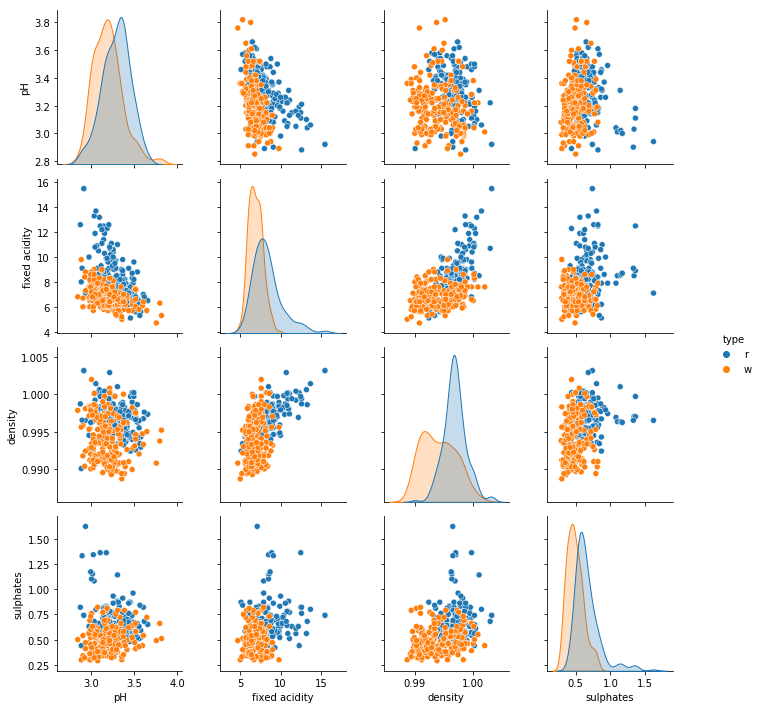

In [7]:
sns.pairplot(df[columns+['type']], hue="type", height=2.5)
plt.show()

### Se quisermos usar duas dessas variáveis para prever o tipo do vinho poderíamos querer olhar para a density e fixed acidity. Um gráfico maior nos permite analisar melhor como essas variáveis se relacionam em cada um dos tipos de vinho.

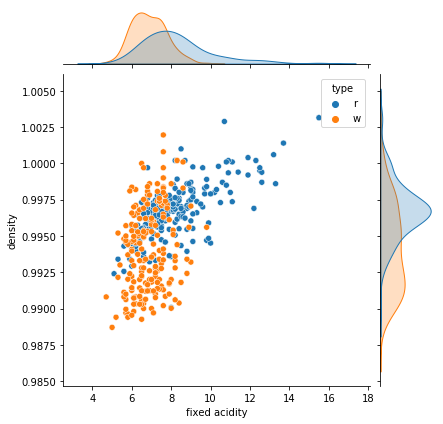

In [8]:
sns.jointplot(data=df, x="fixed acidity", y="density", hue="type")
plt.show()

### Muitas vezes um scatter plot não nos permite entender com precisão a distribuição dos pontos. É o caso aqui pela sobreposição. Neste caso podemos usar o um estimador de densidade multivariado e plotar as curvas de nível. Assim conseguimos ver as diferenças nas distribuições conjuntas em cada um dos tipos de vinho.

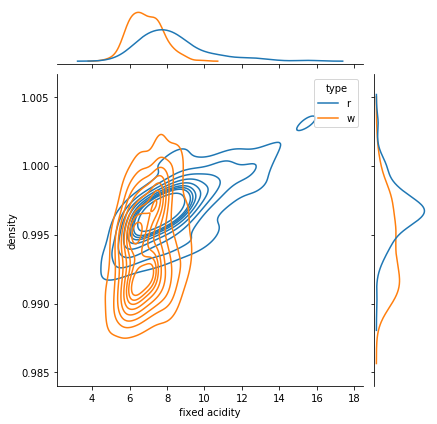

In [9]:
sns.jointplot(data=df, x="fixed acidity", y="density", hue="type", kind="kde")
plt.show()

### Estamos interessados ainda em entender como alguma das variáveis se relaciona com a qualidade. Neste caso podemos fazer boxplot em que colocamos no eixo x os diferentes valores de qualidade do dataset e no eixo y vemos o boxplot para coluna naquele subconjunto de vinhos com qualidade fixada.

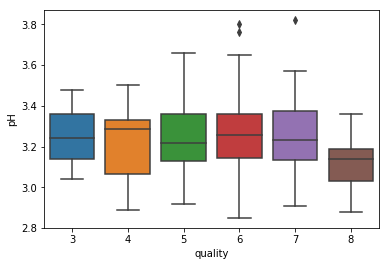

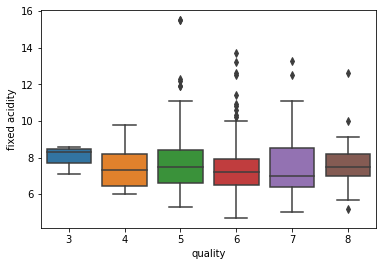

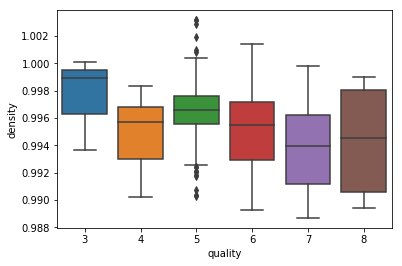

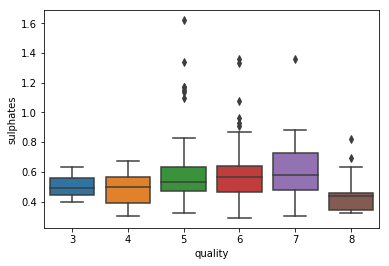

In [10]:
for coluna in columns:
    sns.boxplot(data=df, x="quality", y=coluna)
    plt.show()